# Object Detection

In [7]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import ChessPiece



image 1/1 D:\CodeProjects\University\Chessy3D\data\train_val\train2017\3bab0eaaeb63a2ac9ae4942df4006a25_jpg.rf.a73ecc5f805d4e2c5ed229c00af324bc.jpg: 640x640 2 black-bishops, 1 black-king, 2 black-knights, 6 black-pawns, 1 black-queen, 2 black-rooks, 2 white-bishops, 1 white-king, 2 white-knights, 6 white-pawns, 1 white-queen, 1 white-rook, 13.6ms
Speed: 3.5ms preprocess, 13.6ms inference, 78.4ms postprocess per image at shape (1, 3, 640, 640)
[[[231 233 233]
  [227 229 229]
  [224 226 226]
  ...
  [229 186 179]
  [229 186 179]
  [228 187 179]]

 [[230 232 232]
  [227 229 229]
  [225 227 227]
  ...
  [255  42   4]
  [255  42   4]
  [255  42   4]]

 [[228 230 230]
  [226 228 228]
  [225 227 227]
  ...
  [255  42   4]
  [255  42   4]
  [255  42   4]]

 ...

 [[  5   5   5]
  [  3   3   3]
  [  6   6   6]
  ...
  [  0   2   2]
  [  0   2   2]
  [  1   3   3]]

 [[  4   4   4]
  [  2   2   2]
  [  4   4   4]
  ...
  [  2   4   4]
  [  2   4   4]
  [  3   5   5]]

 [[  3   3   3]
  [  1   1

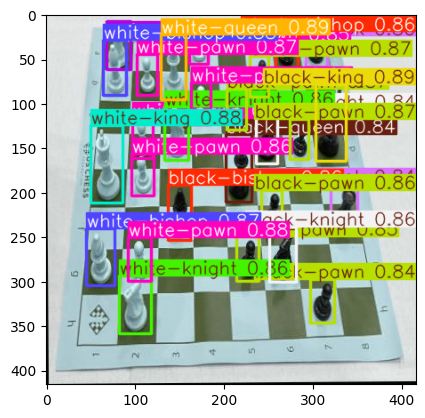

In [3]:
# YOLOv8  model
model = YOLO("chess-model-yolov8m.pt")
#model = YOLO("best.pt")

# make prediction
image_path = "D:\\CodeProjects\\University\\Chessy3D\\data\\train_val\\train2017\\3bab0eaaeb63a2ac9ae4942df4006a25_jpg.rf.a73ecc5f805d4e2c5ed229c00af324bc.jpg"
results = model(image_path) # path to test image
im_array = results[0].plot() # plot a BGR numpy array of predictions

print(results[0].plot())

plt.imshow(im_array)

In [4]:
print(results[0].boxes.cls)

print(results[0].boxes.conf)
print(results[0].boxes.xyxy)


tensor([ 1., 10.,  9.,  7.,  6.,  9.,  9.,  3.,  6., 11.,  3.,  3.,  2.,  3.,  0.,  0.,  8.,  9.,  9.,  8.,  9.,  3.,  2.,  5.,  3.,  4.,  5.], device='cuda:0')
tensor([0.8898, 0.8868, 0.8829, 0.8825, 0.8819, 0.8713, 0.8694, 0.8688, 0.8679, 0.8670, 0.8669, 0.8660, 0.8637, 0.8636, 0.8627, 0.8623, 0.8622, 0.8599, 0.8583, 0.8575, 0.8491, 0.8475, 0.8433, 0.8427, 0.8416, 0.8401, 0.7962], device='cuda:0')
tensor([[303.6461,  79.8697, 337.5266, 165.0639],
        [129.7350,  23.5518, 157.7687,  96.6143],
        [ 92.8806, 251.8252, 118.2928, 300.1414],
        [ 50.2892, 125.2446,  86.1436, 212.4636],
        [ 64.1976,  29.8347,  90.6954,  91.7532],
        [163.5233,  77.5699, 185.0782, 124.2885],
        [102.9453,  45.3829, 125.4004,  91.0197],
        [274.1448, 118.0237, 295.5914, 163.4551],
        [ 45.7190, 241.6956,  77.0919, 305.2828],
        [ 68.6231,   8.6277,  95.6293,  62.1065],
        [203.4106,  84.8764, 225.3337, 130.5620],
        [229.7165,  47.8873, 250.8385,  93.9619

In [5]:
cps = []

for box in results[0].boxes:
    xyxy = box.xyxy[0]
    xyxy_n = box.xyxyn[0]
    color_name = results[0].names[int(box.cls[0])].split("-")
    cp = ChessPiece.ChessPiece(
        x_min=xyxy[0],
        y_min=xyxy[1],
        x_max=xyxy[2],
        y_max=xyxy[3],
        class_number=box.cls[0],
        xn_min=xyxy_n[0],
        yn_min=xyxy_n[1],
        xn_max=xyxy_n[2],
        yn_max=xyxy_n[3],
        class_name=color_name[1],
        class_confidence=box.conf[0],
        class_color=color_name[0],
        xyxy_box_position= box.xyxy[0],
        xyxy_n_box_position = box.xyxyn[0]
    )
    cps.append(cp)



print(cps)

>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called

image 1/1 D:\CodeProjects\University\Chessy3D\data\train_val\train2017\3bab0eaaeb63a2ac9ae4942df4006a25_jpg.

In [ ]:
from ultralytics import YOLO

yolo = YOLO('chess-model-yolov8m.pt')
yolo.train(data='D:\\CodeProjects\\University\\Chessy3D\\data\\yolov8\\data.yaml', epochs=60)
valid_results = yolo.val()
print(valid_results)

Ultralytics 8.3.145  Python-3.13.3 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=D:\CodeProjects\University\Chessy3D\data\yolov8\data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=chess-model-yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=

train: Scanning D:\CodeProjects\University\Chessy3D\data\yolov8\valid\labels.cache... 3583 images, 5007 backgrounds, 0 corrupt: 100%|██████████| 8590/8590 [00:00<?, ?it/s]

train: D:\CodeProjects\University\Chessy3D\data\yolov8\valid\images\05b80e43-00000013_jpg.rf.2bd846cf0eb0439bad865c4d94366d40.jpg: 2 duplicate labels removed
train: D:\CodeProjects\University\Chessy3D\data\yolov8\valid\images\14c5c297-00000149_jpg.rf.00435d96136cd08061124e9f02a4dff6.jpg: 1 duplicate labels removed
train: D:\CodeProjects\University\Chessy3D\data\yolov8\valid\images\656fb621-00000110_jpg.rf.47636fa55c1c5abbbb4cd03d86a44c01.jpg: 1 duplicate labels removed
train: D:\CodeProjects\University\Chessy3D\data\yolov8\valid\images\6b65226b-00000016_jpg.rf.792291d01cb0fc1a7eb90981a591d4c5.jpg: 1 duplicate labels removed
train: D:\CodeProjects\University\Chessy3D\data\yolov8\valid\images\6f0c5f03-00000079_jpg.rf.54e56a75f2b4eb2a2942c324056bd213.jpg: 2 duplicate labels removed
train: D:\CodeProjects\University\Chessy3D\data\yolov8\valid\images\71619694-00000133_jpg.rf.83b760417e1b59466cc0e9e7cc759d33.jpg: 5 duplicate labels removed
train: D:\CodeProjects\University\Chessy3D\data\yolo

val: Fast image access  (ping: 0.00.0 ms, read: 257.377.2 MB/s, size: 52.6 KB)


val: Scanning D:\CodeProjects\University\Chessy3D\data\yolov8\valid\labels.cache... 3583 images, 5007 backgrounds, 0 corrupt: 100%|██████████| 8590/8590 [00:00<?, ?it/s]

train: D:\CodeProjects\University\Chessy3D\data\yolov8\valid\images\05b80e43-00000013_jpg.rf.2bd846cf0eb0439bad865c4d94366d40.jpg: 2 duplicate labels removed
train: D:\CodeProjects\University\Chessy3D\data\yolov8\valid\images\14c5c297-00000149_jpg.rf.00435d96136cd08061124e9f02a4dff6.jpg: 1 duplicate labels removed
train: D:\CodeProjects\University\Chessy3D\data\yolov8\valid\images\656fb621-00000110_jpg.rf.47636fa55c1c5abbbb4cd03d86a44c01.jpg: 1 duplicate labels removed
train: D:\CodeProjects\University\Chessy3D\data\yolov8\valid\images\6b65226b-00000016_jpg.rf.792291d01cb0fc1a7eb90981a591d4c5.jpg: 1 duplicate labels removed
train: D:\CodeProjects\University\Chessy3D\data\yolov8\valid\images\6f0c5f03-00000079_jpg.rf.54e56a75f2b4eb2a2942c324056bd213.jpg: 2 duplicate labels removed
train: D:\CodeProjects\University\Chessy3D\data\yolov8\valid\images\71619694-00000133_jpg.rf.83b760417e1b59466cc0e9e7cc759d33.jpg: 5 duplicate labels removed
train: D:\CodeProjects\University\Chessy3D\data\yolo


image 1/1 D:\CodeProjects\University\Chessy3D\data\train_val\train2017\3bab0eaaeb63a2ac9ae4942df4006a25_jpg.rf.a73ecc5f805d4e2c5ed229c00af324bc.jpg: 640x640 2 black-bishops, 1 black-king, 2 black-knights, 6 black-pawns, 1 black-queen, 2 black-rooks, 2 white-bishops, 1 white-king, 2 white-knights, 6 white-pawns, 1 white-queen, 1 white-rook, 12.8ms
Speed: 2.4ms preprocess, 12.8ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor called
>> ChessPiece constructor

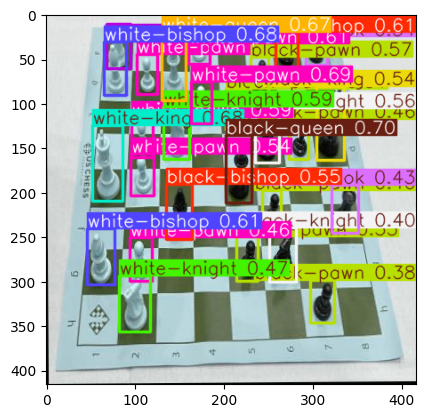

In [17]:
# import object_detection as od
model = YOLO("chess-model-yolov8m.pt")

#model = YOLO("D:\\CodeProjects\\University\\Chessy3D\\src\\object_detection_yolo\\runs\\detect\\train3\\weights\\best.pt")
results = model(image_path)
cps = []

for box in results[0].boxes:
    xyxy = box.xyxy[0]
    xyxy_n = box.xyxyn[0]
    color_name = results[0].names[int(box.cls[0])].split("-")
    cp = ChessPiece.ChessPiece(
        x_min=xyxy[0],
        y_min=xyxy[1],
        x_max=xyxy[2],
        y_max=xyxy[3],
        class_number=box.cls[0],
        xn_min=xyxy_n[0],
        yn_min=xyxy_n[1],
        xn_max=xyxy_n[2],
        yn_max=xyxy_n[3],
        class_name=color_name[1],
        class_confidence=box.conf[0],
        class_color=color_name[0],
        xyxy_box_position=box.xyxy[0],
        xyxy_n_box_position=box.xyxyn[0]
    )
    cps.append(cp)

im_array = results[0].plot()  # plot a BGR numpy array of predictions

plt.imshow(im_array)
